## 1. Bifurcations with one parameter

__Task: Draw the bifurcation diagrams of the following differential equations. Determine the equilibria and the type of bifurcations.__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import warnings

Equation 1)
\begin{align*}
X' = r-X^2 + X^4
\end{align*}

Equation 2)
\begin{align*}
X' = rX-X^3 -X
\end{align*}

Equation 3)
\begin{align*}
X' = rX-X^3 + X^5
\end{align*}

Equation 4)
\begin{align*}
X' = rX-X^3 + X^2
\end{align*}

Equation 5)
\begin{align*}
X' = r + rX^2 - X^3 + X^4
\end{align*}

Equilibrium when $X'=0$.

In [2]:
#Setting the parameters
xmin, xmax = -3,3
rmin, rmax = -3,3
points = 3000


#First we define the variables.
r,X = sp.symbols('r X',real=True)

# The Equation's are better in a dictionary to call them back later.   
equations = {
        "Equation 1: $X' = r-X^2 + X^4$": sp.Eq(0, r - X**2 + X**4),
        "Equation 2: $X' = rX-X^3 -X$": sp.Eq(0, r*X - X**3 - X),
        "Equation 3: $X' = rX-X^3 + X^5$": sp.Eq(0, r*X - X**3 + X**5),
        "Equation 4: $X' = rX-X^3 + X^2$": sp.Eq(0, r*X - X**3 + X**2),
        "Equation 5: $X' = r + rX^2 - X^3 + X^4$": sp.Eq(0, r + r*X**2 - X**3 + X**4)
    }

r_values = np.linspace(rmin,rmax,points)

In [15]:
def solution_eqs(equations):
    solutions_dict = {}
    for title,eq in equations.items():
        solutions_dict[title] = sp.solve(eq, X) #solving for X
    return solutions_dict

    
def get_stable(ax,title,sol,legend): 
    
    def make_dfdx_map(equations):
        map_dict = {}
        for title,eq in equations.items():
            map_dict[title] = sp.lambdify((X,r),sp.diff(eq.rhs,X),'numpy')
        return map_dict
    
    x_values = sp.lambdify(r,sol,'numpy')(r_values) # f(r_values) = x_values is what stands here
    real_x_values = np.where(np.isreal(x_values),np.real(x_values),np.nan) # the condition that the x-value is a real solution, else it gives nan (not a number) back

    slope = make_dfdx_map(equations)[title](x_values,r_values)
    realfinite = np.isfinite(slope) & np.isreal(x_values) #Only the finite and real numbers 

    relevant_data = np.zeros_like(r_values) # this will be used to store the data we want to plot
    relevant_data[realfinite] = slope[realfinite] < 0 #(True, False array for stable points) (stable because )

    # arrays with stable and unstable values (we use np.where to keep the length of the arrays as original to plot later, otherwise it wont work (x and y need the same dimension)).
    stable_values = np.where(relevant_data, real_x_values, np.nan) 
    unstable_values = np.where(np.logical_not(relevant_data), real_x_values, np.nan)


    ax.plot(r_values,stable_values,color='red',label='stable',lw=1.5)
    ax.plot(r_values,unstable_values,color='blue',ls=':',label='unstable',lw=2.5) 

    if legend is True:
        ax.legend()
    

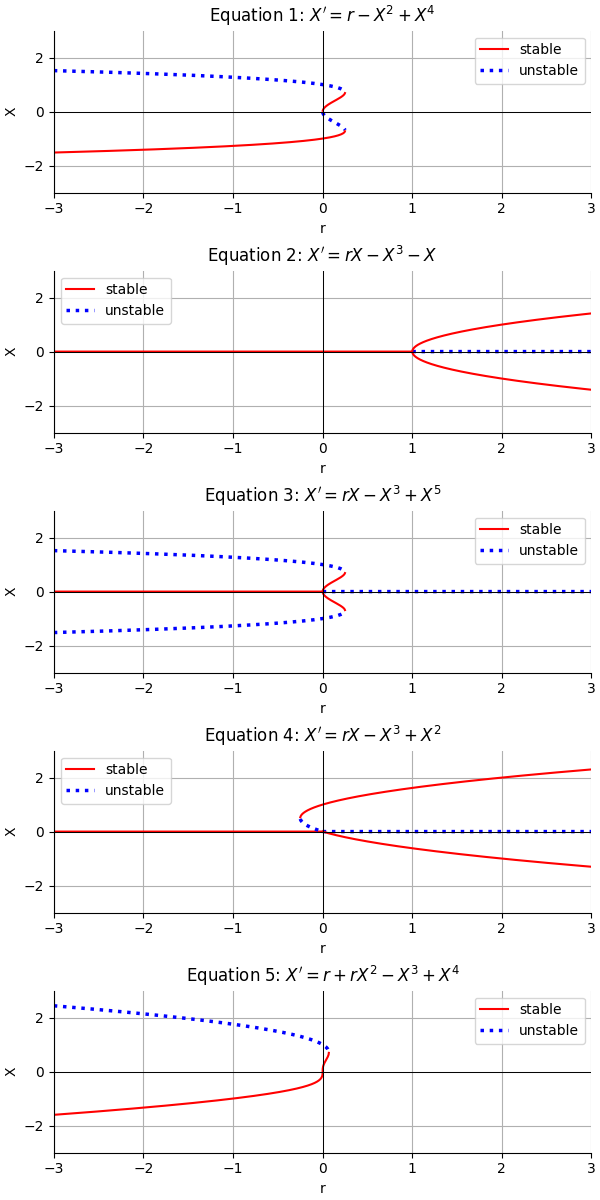

In [16]:
def figures():
    plt.close('all')
    solutions = solution_eqs
    fig, axes = plt.subplots(len(solutions(equations)),1,figsize=(6,12))
    for ax,(title,sols) in zip(axes, solutions(equations).items()): #The sols are equilibria
        legend = True # For the legend we work with boolians, so we only see the legend one time each graph instead of multiple times.
        
        for sol in sols:
            get_stable(ax,title,sol,legend)
            legend = False

        ax.set_title(title) 
        ax.grid() 
        ax.set_xlabel('r')
        ax.set_ylabel('X') 
        ax.set_xlim(rmin,rmax) 
        ax.set_ylim(xmin,xmax)
        ax.axvline(0,color='k',lw=0.7)
        ax.axhline(0,color='k',lw=0.7)
    
    plt.show()
warnings.filterwarnings("ignore", category=RuntimeWarning)
    
figures()    

We have seen three types of bicurcations:
- Transcritical bifurcations
- Saddle node bifurcations
- Pitchfork bifurcations

Equation 4 is an example of the __Transcritical bifurcation__, when the horizontal line equilibrium collides with the other visible equilibrium the exchange stability as you can see.

Equation 1 is an example of the __Saddle node bifurcation__, because when the equilibrium turns back on the r-axes, the equilibrium changes from stable to unstable or the other way. 

Equation 2 and 3 are then an example of the __Pitchfork bifurcation__. They are recognised by their symmetrie.

Equation 5 is also a __Saddle node bifurcation__, but it was a little bit harder to recognise, if you look closely you can see that the quilibrium only turns once from direction in the r-axes direction, thats where the equilibrium changes from stable to unstable or also the way around depending how you look at it.